In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_h5ad('/mnt/LaCIE/ceger/Projects/COPD/COPD_influenza/6-cell-cell_comms/4-tensor/.data/Marburg_cell_states_locked_ctl240709.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'viral_counts', 'infected_status', 'seed_labels', 'batch-scANVI'
    var: 'mt', 'ribo'
    uns: 'cell_compartment_colors', 'cell_states_colors', 'disease_colors', 'group_colors', 'infection_colors'
    obsm: 'X_scANVI', 'X_umap'

In [4]:
adata_log = anndata.AnnData(X = adata.X,  var = adata.var, obs = adata.obs, obsm = adata.obsm)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)
adata_log.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(adata_log, inplace = False)["X"]
)

In [10]:
sc.tl.rank_genes_groups(
    adata_log, groupby="cell_compartment", method="wilcoxon", key_added="dea_leiden_2"
)

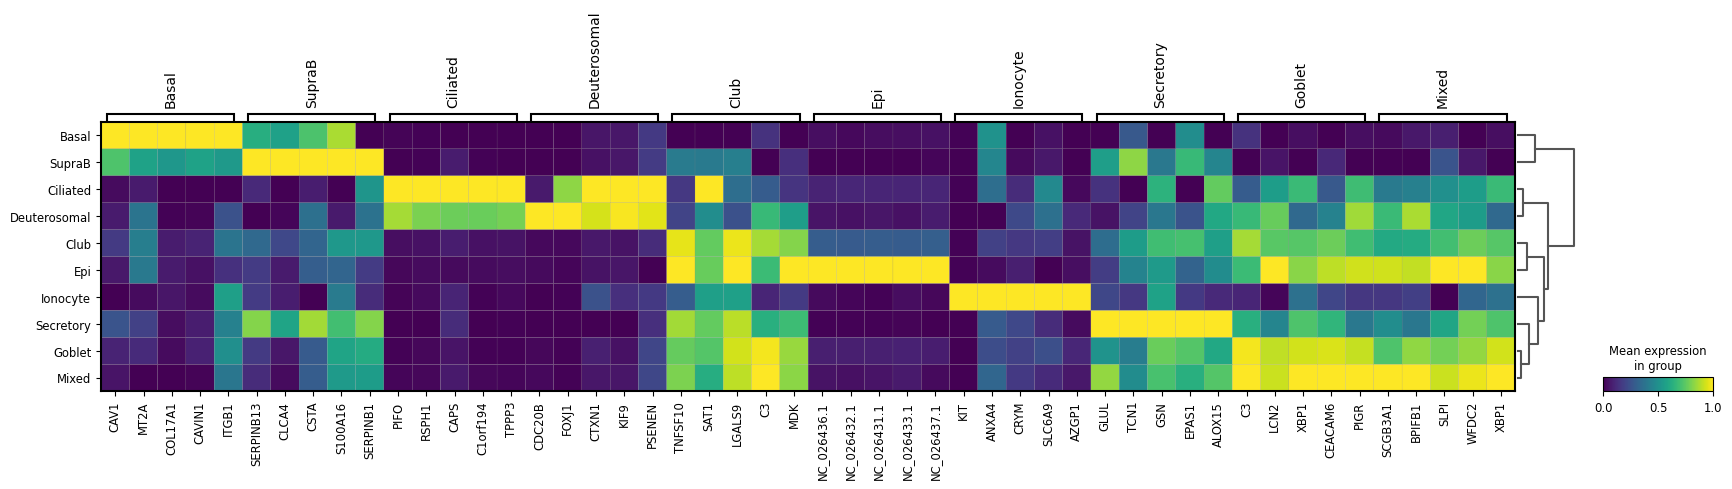

In [46]:
sc.pl.rank_genes_groups_matrixplot(
    adata_log, groupby="cell_compartment", standard_scale="var", n_genes=5, key="dea_leiden_2"
)

In [50]:
sc.tl.filter_rank_genes_groups(
    adata_log,
    min_in_group_fraction=0.2,
    max_out_group_fraction=0.2,
    key="dea_leiden_2",
    key_added="dea_leiden_2_filtered",
)

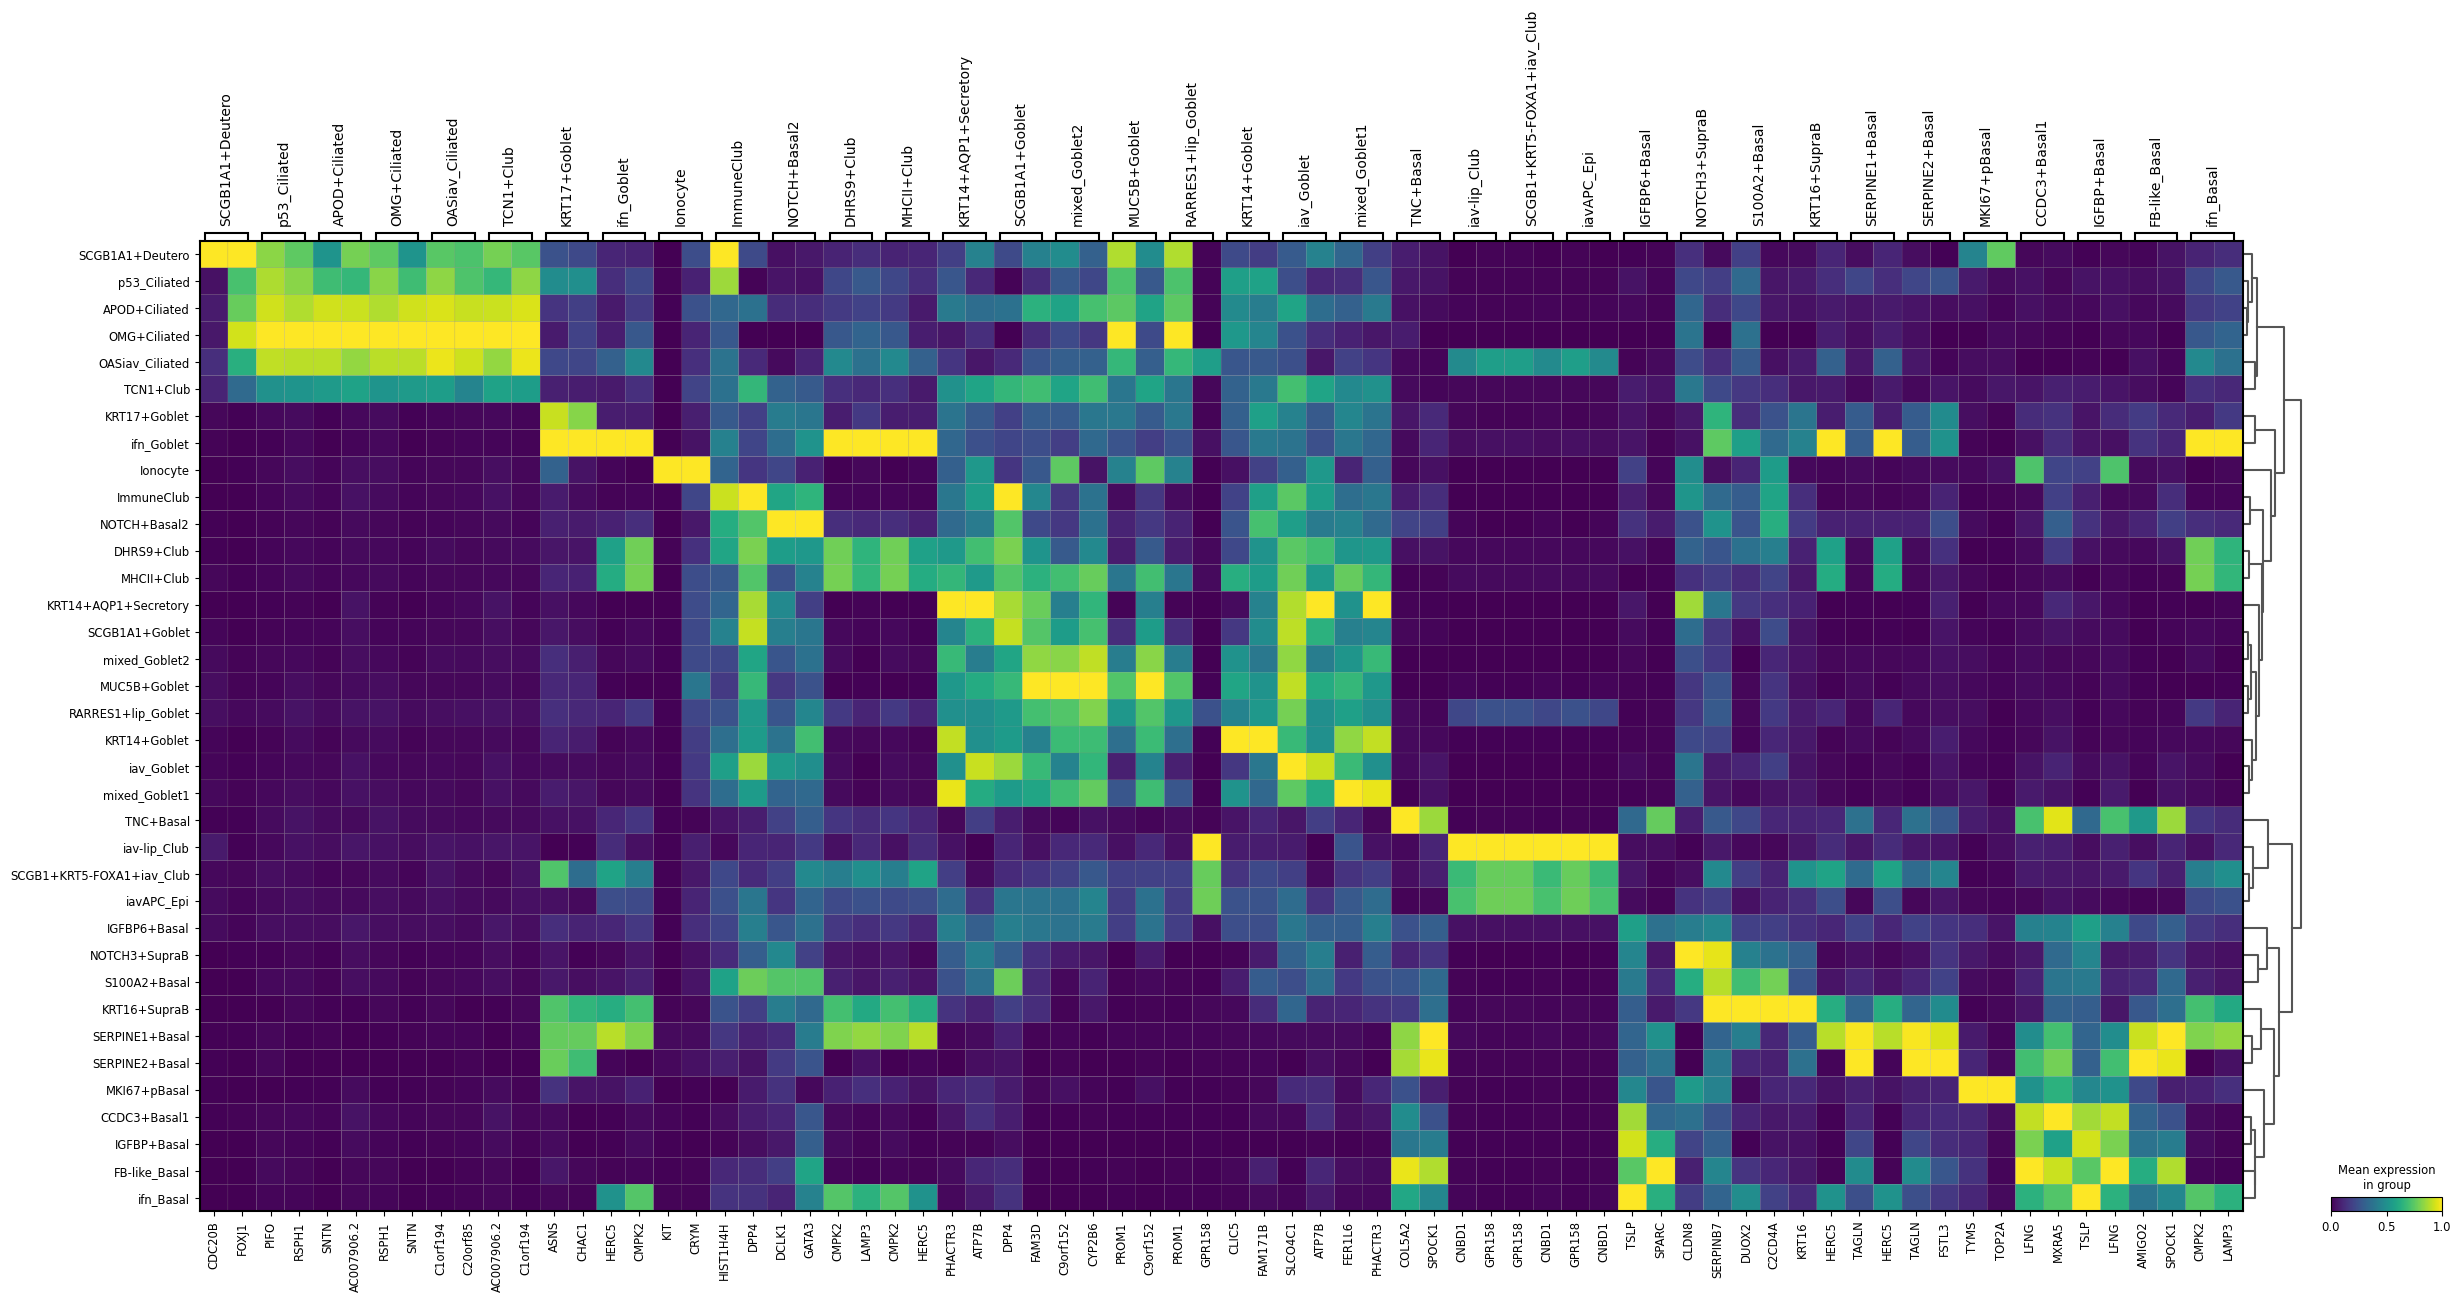

In [51]:
sc.pl.rank_genes_groups_matrixplot(
    adata_log,
    groupby="cell_states",
    standard_scale="var",
    n_genes=2,
    key="dea_leiden_2_filtered",
    save='makers.pdf'
)

In [27]:
list((Basal_markers, 'cell_compartment'))

[['GJA1'], 'cell_compartment']

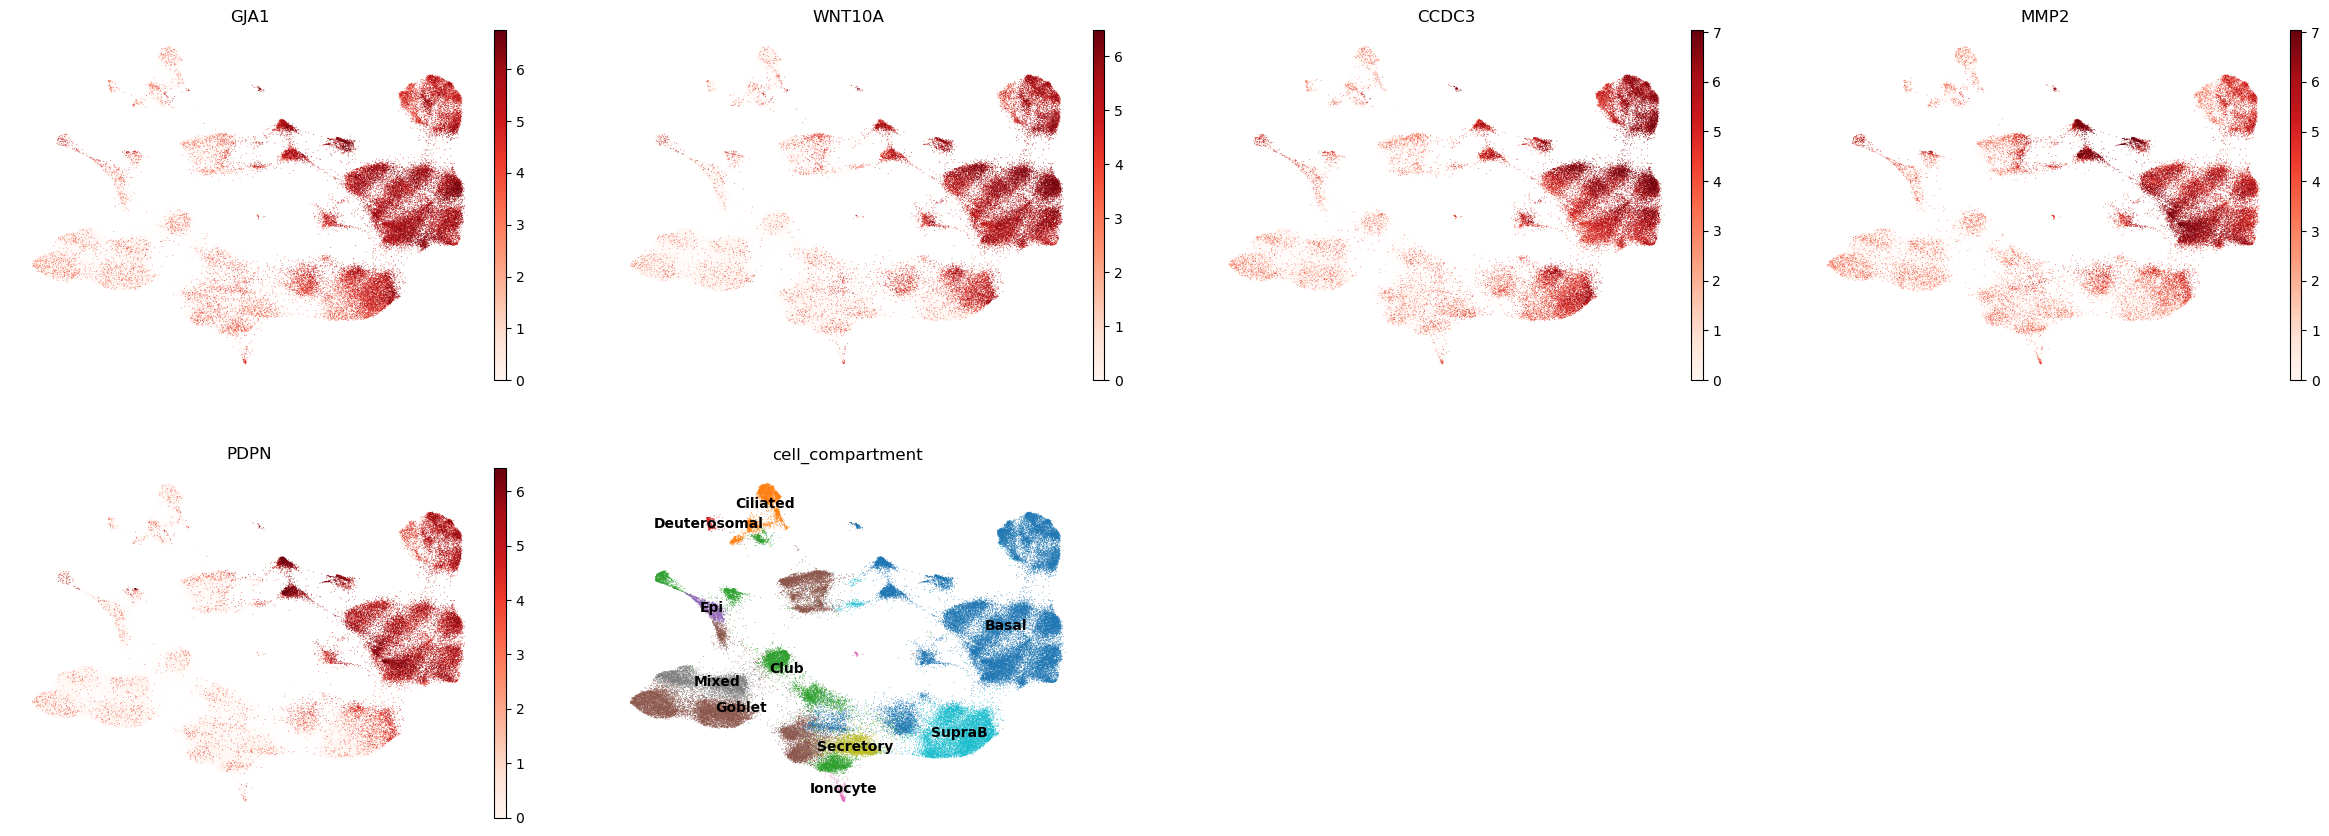

In [31]:
Basal_Markers = ['GJA1', 'WNT10A', 'CCDC3', 'MMP2', 'PDPN']
sc.pl.umap(
    adata_log,
    color=Basal_Markers + ['cell_compartment'],
    vmax="p99",
    legend_loc="on data",
    frameon=False,
    cmap="Reds",
)

In [ ]:
sc.pl.heatmap